In [2]:
%matplotlib notebook
# %matplotlib tk

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import multiprocessing

from ipywidgets import widgets

import skimage
from skimage import io
from skimage.viewer import ImageViewer


# matplotlib.rcParams['toolbar'] = 'None'



In [3]:
img = io.imread(f'images/cat03.jpg')
img = skimage.transform.rescale(img, 0.1)
print(img.shape)
img[:2]

/home/rainsong/miniconda3/envs/cg/lib/python3.7/site-packages/skimage/transform/_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
/home/rainsong/miniconda3/envs/cg/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/rainsong/miniconda3/envs/cg/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(340, 226, 3)


array([[[0.21768156, 0.20201264, 0.17651376],
        [0.21365333, 0.19404548, 0.17051607],
        [0.23117872, 0.21157087, 0.18804146],
        ...,
        [0.31090455, 0.29913985, 0.26587347],
        [0.29024517, 0.27848047, 0.25102949],
        [0.30702279, 0.29330598, 0.26195078]],

       [[0.22126578, 0.20559686, 0.18009799],
        [0.2265698 , 0.20696196, 0.18343255],
        [0.23551255, 0.21590471, 0.19237529],
        ...,
        [0.31289106, 0.29720479, 0.26191067],
        [0.30127007, 0.28950536, 0.26205438],
        [0.27747119, 0.26375438, 0.23239918]]])

<IPython.core.display.Javascript object>


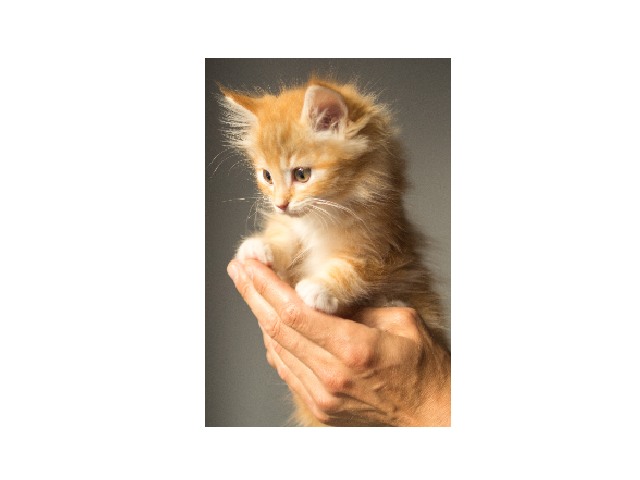

In [4]:
# viewer = ImageViewer(img)
# viewer.show()
f, axarr = plt.subplots(1,1)
axarr.axis('off')
axarr.imshow(img)

<IPython.core.display.Javascript object>


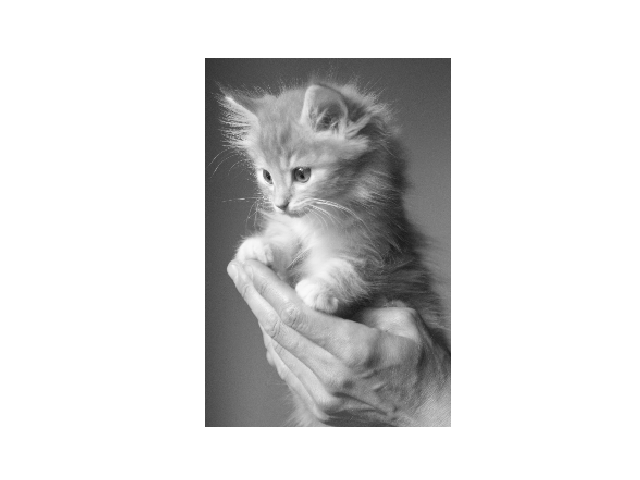

In [7]:
gray_image = img.copy()

y_, x_, _ = gray_image.shape
for x in range(x_):
    for y in range(y_):
        gray = np.mean(gray_image[y, x])
        gray_image[y, x] = gray

f, axarr = plt.subplots(1,1)
axarr.axis('off')
axarr.imshow(gray_image)

In [5]:
def get_histogram(image):
    #Image is gray, so take only red pixels
    image = image[:, :, 0]
    # Transform image to 1 dimension array
    return [pix for col in image for pix in col]

<IPython.core.display.Javascript object>


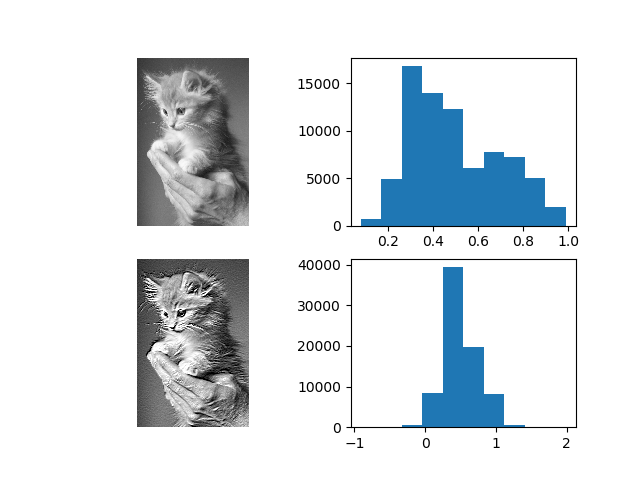

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(array([3.0000e+01, 7.4000e+01, 4.9900e+02, 8.3790e+03, 3.9370e+04,
        1.9775e+04, 8.2060e+03, 4.5200e+02, 4.2000e+01, 1.3000e+01]),
 array([-0.90930323, -0.61976992, -0.33023661, -0.0407033 ,  0.24883001,
         0.53836333,  0.82789664,  1.11742995,  1.40696326,  1.69649657,
         1.98602988]),
 <a list of 10 Patch objects>)

In [8]:
im = gray_image.copy()

def get_neighborhood(im, x_, y_, d_size):
    size = int(d_size / 2)
    if d_size % 2 == 0:
        return im[x_ - size + 1: x_ + size + 1, 
                  y_ - size + 1: y_ + size + 1, 
                  0]
    return im[x_ - size : x_ + size + 1, 
                  y_ - size : y_ + size + 1, 
                  0]

def apply_mask(im, mask):
    x_max, y_max, _ = im.shape
    
    neigh_size, _ = mask.shape
    
    new_im = im.copy()
    for x in range(1, x_max - 1):
        for y in range(1, y_max - 1):
            neighs = np.array(get_neighborhood(im, x, y, neigh_size))  
            applied_matrix = neighs * mask
            summed = applied_matrix.flatten().sum()
            new_im[x][y] = summed
    return new_im
            
f, axarr = plt.subplots(2, 2)
for ax in axarr[:, 0]: ax.axis('off')

axarr[0][0].imshow(gray_image)
axarr[0][1].hist(get_histogram(gray_image))

masked_im = apply_mask(im, np.array([
    [1, 1, 1],
    [1, 1, -1],
    [-1, -1, -1]
]))

axarr[1][0].imshow(masked_im)
axarr[1][1].hist(get_histogram(masked_im))


<IPython.core.display.Javascript object>


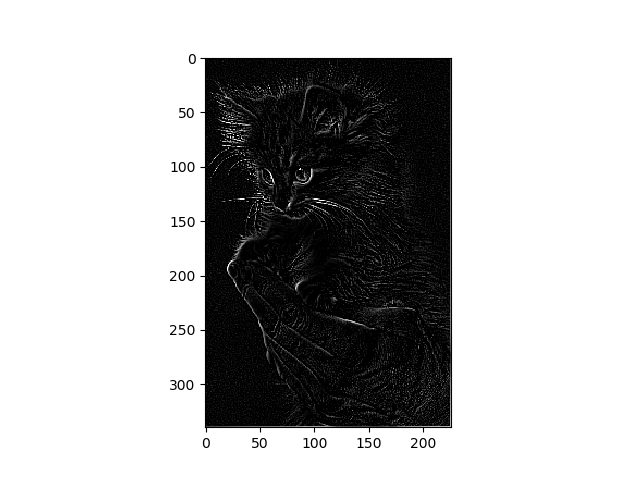

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [9]:
gradient_im = apply_mask(im, np.array([
    [-1, -1, -1],
    [-1, 5, 0],
    [-1, 0, 0]
]))

_, arr = plt.subplots(1, 1)
plt.imshow(gradient_im)

<IPython.core.display.Javascript object>


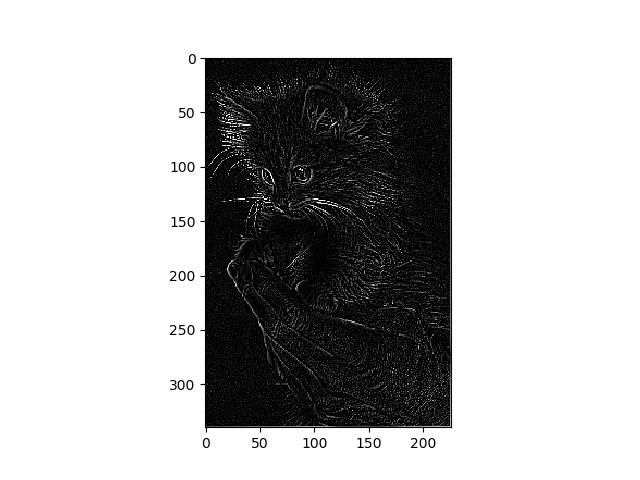

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [10]:

highpass_im = apply_mask(im, np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
]))
_, arr = plt.subplots(1, 1)
plt.imshow(highpass_im)

<IPython.core.display.Javascript object>


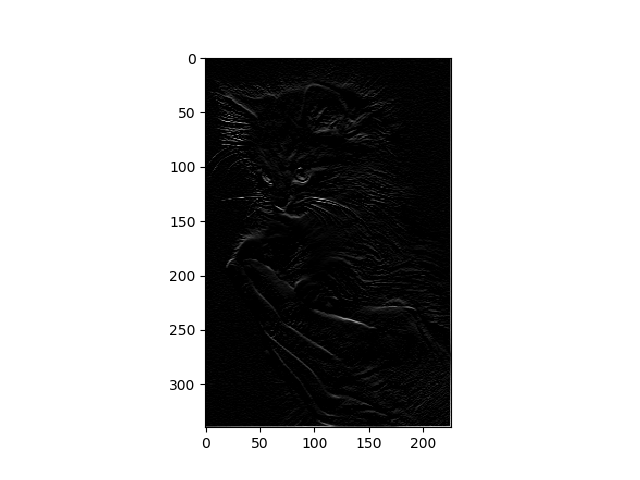

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [12]:
hor_gradient_im = apply_mask(im, np.array([
    [-1, -1],
    [1, 1]
]))
_, arr = plt.subplots(1, 1)
plt.imshow(hor_gradient_im)

<IPython.core.display.Javascript object>


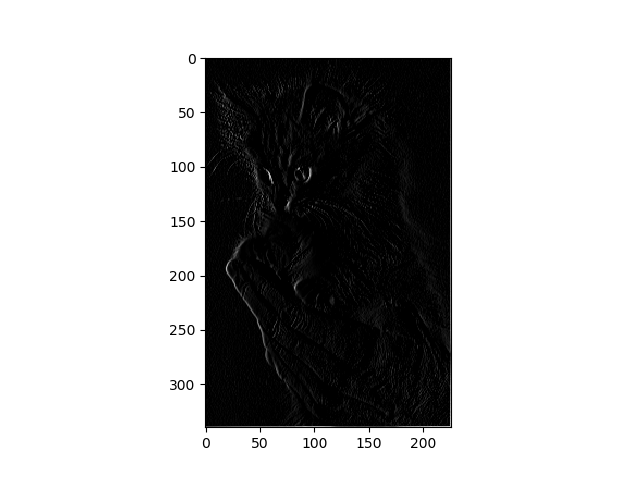

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [13]:
vert_gradient_im = apply_mask(im, np.array([
    [-1, 1],
    [-1, 1]
]))
_, arr = plt.subplots(1, 1)
plt.imshow(vert_gradient_im)

<IPython.core.display.Javascript object>


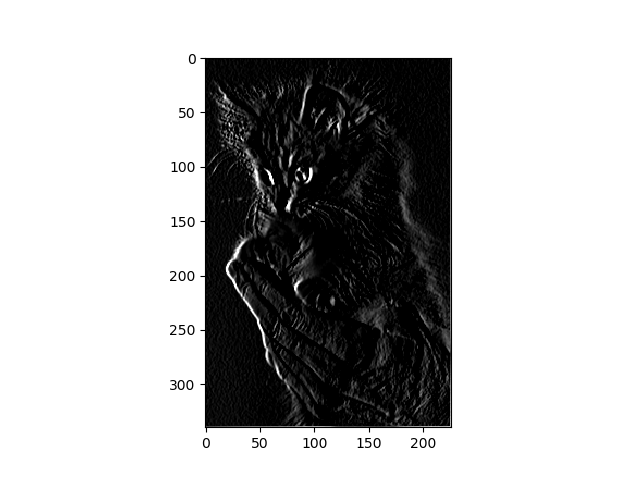

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [14]:
hor_sobel_im = apply_mask(im, np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
]))
_, arr = plt.subplots(1, 1)
plt.imshow(hor_sobel_im)

<IPython.core.display.Javascript object>


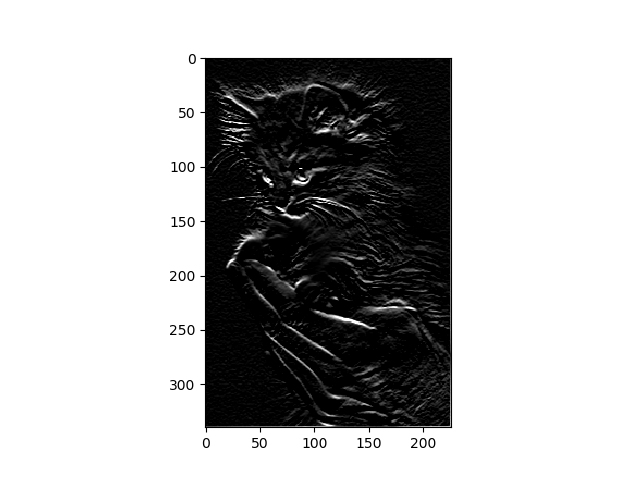

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [15]:
vert_sobel_im = apply_mask(im, np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
]))
_, arr = plt.subplots(1, 1)
plt.imshow(vert_sobel_im)

<IPython.core.display.Javascript object>


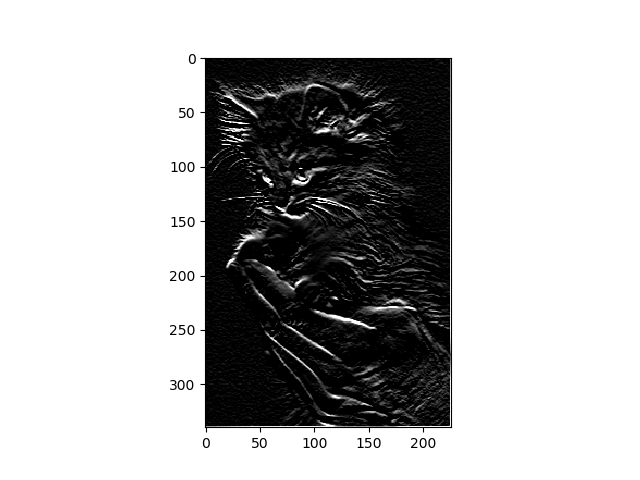

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [16]:
full_sobel_im = vert_sobel_im + hor_gradient_im
_, arr = plt.subplots(1, 1)
plt.imshow(full_sobel_im)